In [27]:
!pip install -q lucid>=0.2.3

import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 500,300
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [28]:
#midpoint line stuffs

def draw(x,y):
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(x, y)
  gl.glEnd()

###############################################################################

def graph_adjusted_draw_line(x,y,x_offset,y_offset,graph_factor):
  x = (x + x_offset) / graph_factor
  y = (y + y_offset) / graph_factor

  draw(x,y)

###############################################################################

def find_zone(x1, y1, x2, y2):

  dx = x2 - x1
  dy = y2 - y1

  if (abs(dx) > abs(dy)):
    if (dx >= 0 and dy >= 0):
      return 0
    elif (dx <= 0 and dy >= 0):
      return 3
    elif (dx <= 0 and dy <= 0):
      return 4
    elif (dx >= 0 and dy <= 0):
      return 7

  else:
    if (dx >= 0 and dy >= 0):
      return 1
    elif (dx <= 0 and dy >= 0):
      return 2
    elif (dx <= 0 and dy <= 0):
      return 5
    elif (dx >= 0 and dy <= 0):
      return 6

###############################################################################

def zero_conversion(zone, x1, y1, x2, y2):
  
  if (zone == 0):
    x3 = x1
    y3 = y1
    x4 = x2
    y4 = y2
    
    return x3,y3,x4,y4

  elif (zone == 1):
    x3 = y1
    y3 = x1
    x4 = y2
    y4 = x2
    
    return x3,y3,x4,y4
    
  elif (zone == 2):
    x3 = y1
    y3 = -x1
    x4 = y2
    y4 = -x2

    return x3,y3,x4,y4
    
  elif (zone == 3):
    x3 = -x1
    y3 = y1
    x4 = -x2
    y4 = y2
    
    return x3,y3,x4,y4
    
  elif (zone == 4):
    x3 = -x1
    y3 = -y1
    x4 = -x2
    y4 = -y2
    
    return x3,y3,x4,y4
    
  elif (zone == 5):
    x3 = -y1
    y3 = -x1
    x4 = -y2
    y4 = -x2
    
    return x3,y3,x4,y4
    
  elif (zone == 6):
    x3 = -y1
    y3 = x1
    x4 = -y2
    y4 = x2
    
    return x3,y3,x4,y4
    
  elif (zone == 7):
    x3 = x1
    y3 = -y1
    x4 = x2
    y4 = -y2
    
    return x3,y3,x4,y4
    
###############################################################################

def originally_converted_draw(points, zone, x_offset, y_offset, graph_factor):
  
  for point in points:

    x = point[0]
    y = point[1]

    if (zone == 0):
      x1 = x
      y1 = y
      
    elif (zone == 1):
      x1 = y
      y1 = x

    elif (zone == 2):
      x1 = -y
      y1 = x

    elif (zone == 3):
      x1 = -x
      y1 = y

    elif (zone == 4):
      x1 = -x
      y1 = -y

    elif (zone == 5):
      x1 = -y
      y1 = -x

    elif (zone == 6):
      x1 = y
      y1 = -x

    elif (zone == 7):
      x1 = x
      y1 = -y

    graph_adjusted_draw_line(x1,y1,x_offset,y_offset,graph_factor)

###############################################################################

def midpoint_algo(points):
  #for point in points:
  a = points[0]
  b = points[1]
  c = points[2]
  d = points[3]

  zone = find_zone(a, b, c, d)

  x1,y1,x2,y2 = zero_conversion(zone, a, b, c, d)

  dx = x2 - x1
  dy = y2 - y1
  d = (2*dy) - dx
  east_increment = 2*dy
  northeast_increment = (2*dy) - (2*dx)
  x3 = x1
  y3 = y1
  x4 = x2
  y4 = y2

  vertical_grid_points.append((x1,y1))
  vertical_grid_points.append((x2,y2))

  while (x3 < x4):
    
    if (d <= 0):
      d = d + east_increment
      x3 = x3 + 1
    
    else:
      d = d + northeast_increment
      x3 = x3 + 1
      y3 = y3 + 1
    
    vertical_grid_points.append((x3,y3))

  return zone, vertical_grid_points

###############################################################################


In [29]:
#midpoint circle stuffs

def graph_adjusted_draw(x,y,offset_x,offset_y,centre_x,centre_y,graph_factor):
  x = (x + offset_x + centre_x) / graph_factor
  y = (y + offset_y + centre_y) / graph_factor

  draw(x,y)
    
###############################################################################

def different_zone_converted(points, offset_x, offset_y, centre_x, centre_y, graph_factor):
  for point in points:
    
    x = point[0]
    y = point[1]

    #at_zone_1
    x1 = x
    y1 = y
    graph_adjusted_draw(x1, y1, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_0
    x0 = y
    y0 = x
    graph_adjusted_draw(x0, y0, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_2
    x2 = -x
    y2 = y
    graph_adjusted_draw(x2, y2, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_3
    x3 = -y
    y3 = x
    graph_adjusted_draw(x3, y3, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_4
    x4 = -y
    y4 = -x
    graph_adjusted_draw(x4, y4, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_5
    x5 = -x
    y5 = -y
    graph_adjusted_draw(x5, y5, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_6
    x6 = x
    y6 = -y
    graph_adjusted_draw(x6, y6, offset_x, offset_y, centre_x, centre_y, graph_factor)

    #at_zone_7
    x7 = y
    y7 = -x
    graph_adjusted_draw(x7, y7, offset_x, offset_y, centre_x, centre_y, graph_factor)

###############################################################################

def midpoint_circle(radius, points):
  x = 0
  y = radius
  d = 1 - radius
  points.append((x,y))

  while (x < y):
    
    if (d < 0):
      d = d + (2*x) + 3
      x = x + 1
    
    else:
      d = d + (2*x) - (2*y) + 5
      x = x + 1
      y = y - 1
    
    points.append((x,y))
  
  return points
###############################################################################


In [40]:
#other stuffs

def show_output():
  print("   column 1       column 2       column 3       column 4       column 5       column 6       column 7")
  img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  display(Image.fromarray(img,'RGB'))

###############################################################################

def grids_vertical(vertical_grid_points, vertical_zone, vertical_grid_offset, graph_factor):

  count = -100 + vertical_grid_offset

  while (count < 100):

    originally_converted_draw(vertical_grid_points, vertical_zone, count, 0, graph_factor)
    #show_output()
    count = count + vertical_grid_offset

###############################################################################

def grids_horizontal(horizontal_grid_points, horizontal_zone, horizontal_grid_offset, graph_factor):

  count = -100 + horizontal_grid_offset

  while (count < 100):

    originally_converted_draw(horizontal_grid_points, horizontal_zone, 0, count, graph_factor)
    #show_output()
    count = count + horizontal_grid_offset

###############################################################################

def circles_on_grid(grid_circles, vertical_grid_offset, horizontal_grid_offset, centre_shift_x, centre_shift_y, graph_factor):

  i = -3
  while (i <= 3):
    j = -3
    while (j <= 2):
      g = (i * vertical_grid_offset)
      h = (j * horizontal_grid_offset)

      different_zone_converted(grid_circles, g, h, centre_shift_x, centre_shift_y, graph_factor)

      j = j + 1

      #print(i," ",j)

    i = i + 1

###############################################################################

def fill_up_circle(fill_circle, vertical_x, horizontal_y):
  
  g = (vertical_x * vertical_grid_offset)
  h = (horizontal_y * horizontal_grid_offset)
  
  for point in fill_circle:
    x = point[0]
    y = point[1]

    count = y

    while(count >= 0):

      graph_adjusted_draw(x, count, g, h, 0, centre_shift_y, graph_factor)
      graph_adjusted_draw(x, -count, g, h, 0, centre_shift_y, graph_factor)

      count = count - 1

###############################################################################

def column_validity(fill_up_update, column):
  
  if (column > 0 and column < 8):
    
    temp = (7 * 1) - (8 - column)
    
    if (fill_up_update[temp] == 0):
      return False
    
    else:
      return True
  
  else:
    return True

###############################################################################

def game_update(fill_circle, fill_up_update, fill_up_offset_coordinates, fill_up_players, column, player):
  row = 6
  while (row > 0):
    temp = (7 * row) - (8 - column)
    if (fill_up_update[temp] == 0):
      fill_up_update[temp] = 1
      break

    row = row - 1
  
  point = fill_up_offset_coordinates[temp]

  if (player == 1):
    fill_up_players[temp] = 11
    gl.glColor3f(1,0,0)
  
  else:
    fill_up_players[temp] = 22
    gl.glColor3f(0,1,0)
  
  fill_up_circle(fill_circle, point[0], point[1])

###############################################################################

def column_wise_check(fill_up_players, player_value):
  column = 7
  while(column > 0):
    row = 6
    count = 0
    while(row > 0):
      temp = (7 * row) - (8 - column)
      if(fill_up_players[temp] == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match column wise!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp + (3 * 7)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()

        return True
      
      row = row - 1

    column = column - 1

  return False

###############################################################################

def row_wise_check(fill_up_players, player_value):
  row = 6
  while(row > 0):
    column = 7
    count = 0
    while(column > 0):
      temp = (7 * row) - (8 - column)
      if(fill_up_players[temp] == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match row wise!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp + (3 * 1)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()

        return True
      
      column = column - 1

    row = row - 1

  return False

###############################################################################

def from_top_left_check(fill_up_players, player_value):
  column = 4
  while(column <= 7):
    start_index = column - 1
    limit = column * 6
    count = 0
    while(start_index < limit):
      value = fill_up_players[start_index]

      if(value == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match diagonally!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp - (3 * 6)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()

        return True
      
      start_index = start_index + 6
    
    column = column + 1
  
  row_wise_index = 13
  while(row_wise_index <= 20):
    temp = row_wise_index
    count = 0
    while(temp < 42):
      value = fill_up_players[temp]

      if(value == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match diagonally!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp - (3 * 6)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()

        return True
      
      temp = temp + 6
    
    row_wise_index = row_wise_index + 7
  
  return False

###############################################################################

def from_top_right_check(fill_up_players, player_value):
  column = 4
  while(column > 1):
    start_index = column - 1
    limit = (8 - column) * 7
    count = 0
    while(start_index < limit):
      value = fill_up_players[start_index]

      if(value == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match diagonally!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp - (3 * 8)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()
        
        return True
      
      start_index = start_index + 8
    
    column = column - 1
  
  row_wise_index = 0
  while(row_wise_index <= 14):
    temp = row_wise_index
    count = 0
    while(temp < 42):
      value = fill_up_players[temp]

      if(value == player_value):
        count = count + 1
      else:
        count = 0

      if(count == 4):
        print("There's a match diagonally!")

        gl.glColor3f(0,0,0)
        gl.glPointSize(5)

        line_1 = fill_up_offset_coordinates[temp]

        p = (line_1[0] * vertical_grid_offset) / 100
        q = ((line_1[1] * horizontal_grid_offset) + radius + 3.2) / 100

        line_2 = fill_up_offset_coordinates[temp - (3 * 8)]

        r = (line_2[0] * vertical_grid_offset) / 100
        s = ((line_2[1] * horizontal_grid_offset) + radius + 3.2) / 100

        gl.glBegin(gl.GL_LINES)

        gl.glVertex2f(p,q)
        gl.glVertex2f(r,s)

        gl.glEnd()

        return True
      
      temp = temp + 8
    
    row_wise_index = row_wise_index + 7
  
  return False

###############################################################################

def winner_check(fill_up_players, player_value):
  a = column_wise_check(fill_up_players, player_value)
  if(a == True):
    return True
  
  b = row_wise_check(fill_up_players, player_value)
  if(b == True):
    return True
  
  c = from_top_left_check(fill_up_players, player_value)
  if(c == True):
    return True
  
  d = from_top_right_check(fill_up_players, player_value)
  if(d == True):
    return True
  
  return False

###############################################################################


player 1 name: 
player 2 name: 
   column 1       column 2       column 3       column 4       column 5       column 6       column 7


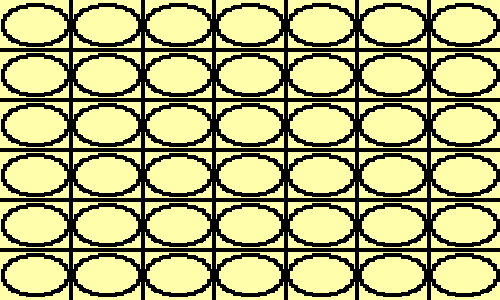


 

which unfilled column from 1-7 do you want to choose, player 01 :5
which unfilled column from 1-7 do you want to choose, player 02 :1
   column 1       column 2       column 3       column 4       column 5       column 6       column 7


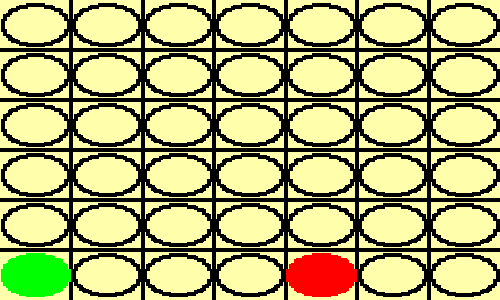


 

which unfilled column from 1-7 do you want to choose, player 01 :5
which unfilled column from 1-7 do you want to choose, player 02 :2
   column 1       column 2       column 3       column 4       column 5       column 6       column 7


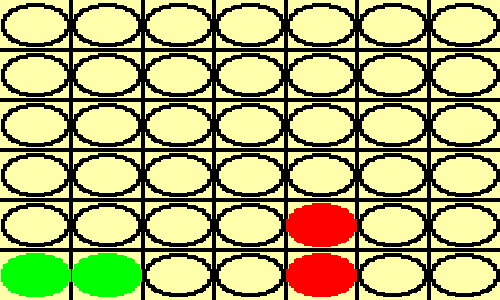


 

which unfilled column from 1-7 do you want to choose, player 01 :5
which unfilled column from 1-7 do you want to choose, player 02 :3
   column 1       column 2       column 3       column 4       column 5       column 6       column 7


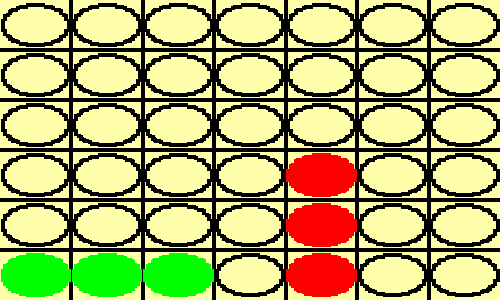


 

which unfilled column from 1-7 do you want to choose, player 01 :5
There's a match column wise!
Congratulations! You have won, player 01
   column 1       column 2       column 3       column 4       column 5       column 6       column 7


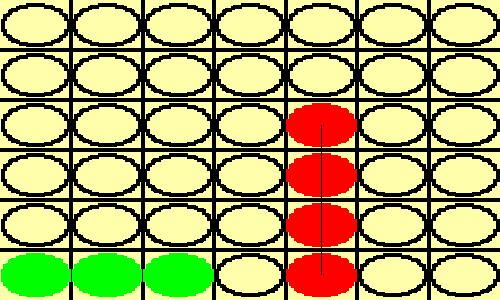

In [41]:
from IPython.display import display
from PIL import Image
import math

gl.glClearColor(1,1,0.67,0)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

################################################################
graph_factor = 100
gl.glColor3f(0,0,0)
gl.glPointSize(3.5)

vertical_grid = (0,100,0,-100)
vertical_grid_points = []
vertical_zone, vertical_grid_points = midpoint_algo(vertical_grid)

vertical_grid_offset = 200 / 7

grids_vertical(vertical_grid_points, vertical_zone, vertical_grid_offset, graph_factor)

#print(vertical_zone)
#print(vertical_grid_points)

################################################################

rotation = 90
theta = math.radians(rotation)

horizontal_grid_points = []

for point in vertical_grid_points:

  m = (point[0] * math.cos(theta)) - (point[1] * math.sin(theta))
  n = (point[1] * math.cos(theta)) + (point[0] * math.sin(theta))

  horizontal_grid_points.append((m,n))

horizontal_zone = vertical_zone
#print(horizontal_zone)
horizontal_grid_offset = 200 / 6

grids_horizontal(horizontal_grid_points, horizontal_zone, horizontal_grid_offset, graph_factor)

################################################################

grid_circles = []
radius = (vertical_grid_offset / 2) - 1
grid_circles = midpoint_circle(radius, grid_circles)
#print(big_circle)
centre_shift_y = radius + 3.2

circles_on_grid(grid_circles, vertical_grid_offset, horizontal_grid_offset, 0, centre_shift_y, graph_factor)

################################################################

fill_circle = []

for point in grid_circles:
  fill_circle.append((point[1], point[0]))
  fill_circle.append((point[0], point[1]))
  fill_circle.append((- point[0], point[1]))
  fill_circle.append((- point[1], point[0]))

################################################################

fill_up_update = []
fill_up_players = []
count = 0

while(count < 42):
  fill_up_update.append(0)
  fill_up_players.append(0)
  count = count + 1

fill_up_offset_coordinates = []

j = 2
while (j >= -3):
  
  i = -3
  while (i <= 3):
    fill_up_offset_coordinates.append((i,j))
    
    i = i + 1
  
  j = j - 1


player_1_name = input("player 1 name: ")
player_2_name = input("player 2 name: ")

if(player_1_name == ""):
  player_1_name = "player 01"

if(player_2_name == ""):
  player_2_name = "player 02"


show_output()
print("\n \n")

turn = 1
winner = "draw"

while(turn <= 21):
  
  flag01 = True
  while(flag01):
    player_1_col = int(input("which unfilled column from 1-7 do you want to choose, " + player_1_name + " :"))
    flag01 = column_validity(fill_up_update, player_1_col)
  
  game_update(fill_circle, fill_up_update, fill_up_offset_coordinates, fill_up_players, player_1_col, 1)
  
  if(turn > 3):
    if(winner_check(fill_up_players, 11)):
      winner = player_1_name
      break

  flag02 = True
  while(flag02):
    player_2_col = int(input("which unfilled column from 1-7 do you want to choose, " + player_2_name + " :"))
    flag02 = column_validity(fill_up_update, player_2_col)

  game_update(fill_circle, fill_up_update, fill_up_offset_coordinates, fill_up_players, player_2_col, 2)
  
  if(turn > 3):
    if(winner_check(fill_up_players, 22)):
      winner = player_2_name
      break

  show_output()
  print("\n \n")

  turn = turn + 1


if(winner == player_1_name):
  print("Congratulations! You have won, " + player_1_name)
elif(winner == player_2_name):
  print("Congratulations! You have won, " + player_2_name)
else:
  print("The match is a draw!")

################################################################

show_output()